In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset3.csv')

In [2]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
drop_columns=['customerID']
dataset.drop(drop_columns,axis=1,inplace=True)
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'],errors='coerce')
dataset['Churn']=dataset['Churn'].replace({'Yes':1,'No':0})
dataset['Churn']=dataset['Churn'].astype(float)
###THIS SECTION IS DATASET SPECIFIC PROCESSING


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


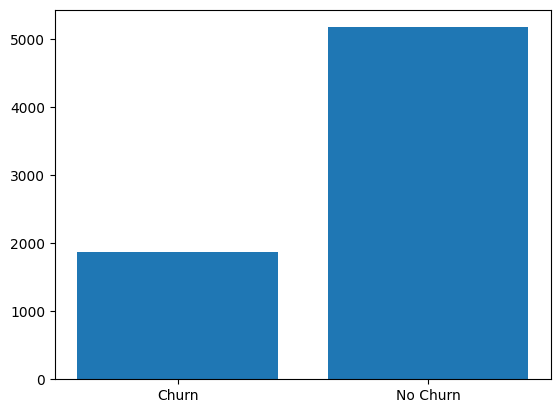

In [5]:
from pre_processor import PreProcessor


label_column = 'Churn'
pre_processor = PreProcessor(dataset)
pre_processor.rename_label(label_column).split_features_labels().plot_imbalance()
   

In [6]:
dataset.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043.000000
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,NaN
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,NaN
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,0.265370
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,0.441561
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,0.000000
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,0.000000
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,1.000000


In [7]:
binary_encode_columns=[]
one_hot_encode_columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
ordinal_encode_columns=[]
scaling_columns=['tenure','MonthlyCharges','TotalCharges']


In [8]:
scaling_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [9]:

pre_processor.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()
    

In [10]:
pre_processor.dataset

,gender_1,gender_2,SeniorCitizen,Partner_1,Partner_2,Dependents_1,Dependents_2,tenure,PhoneService_1,PhoneService_2,...,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges,churn
0,1,0,0,1,0,1,0,-1.285566,1,0,...,0,1,0,1,0,0,0,-1.165523,-0.997284,0.0
1,0,1,0,0,1,1,0,0.060346,0,1,...,0,0,1,0,1,0,0,-0.264071,-0.176848,0.0
2,0,1,0,0,1,1,0,-1.244781,0,1,...,0,1,0,0,1,0,0,-0.367189,-0.962740,1.0
3,0,1,0,0,1,1,0,0.508983,1,0,...,0,0,1,0,0,1,0,-0.751387,-0.198355,0.0
4,1,0,0,0,1,1,0,-1.244781,0,1,...,0,1,0,1,0,0,0,0.193308,-0.943549,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10301,1,0,0,0,1,1,0,-1.285566,0,1,...,0,1,0,1,0,0,0,0.668981,-0.972953,1.0
10302,1,0,0,0,1,1,0,-1.203996,0,1,...,0,1,0,0,0,0,1,0.339669,-0.891027,1.0
10303,1,0,0,0,1,0,1,-0.714573,0,1,...,0,1,0,0,0,1,0,0.698919,-0.450356,1.0
10304,0,1,0,0,1,0,1,-0.225151,0,1,...,0,1,0,1,0,0,0,0.486030,-0.048443,1.0


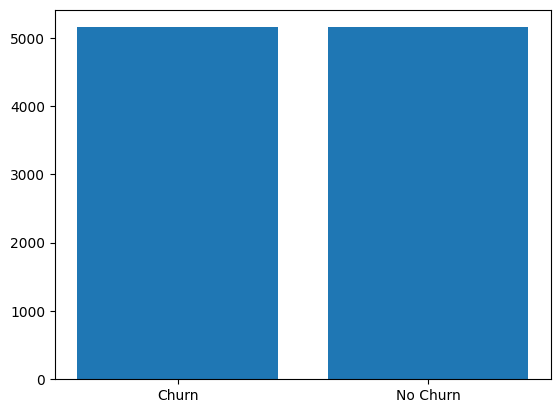

In [11]:
pre_processor.plot_imbalance()

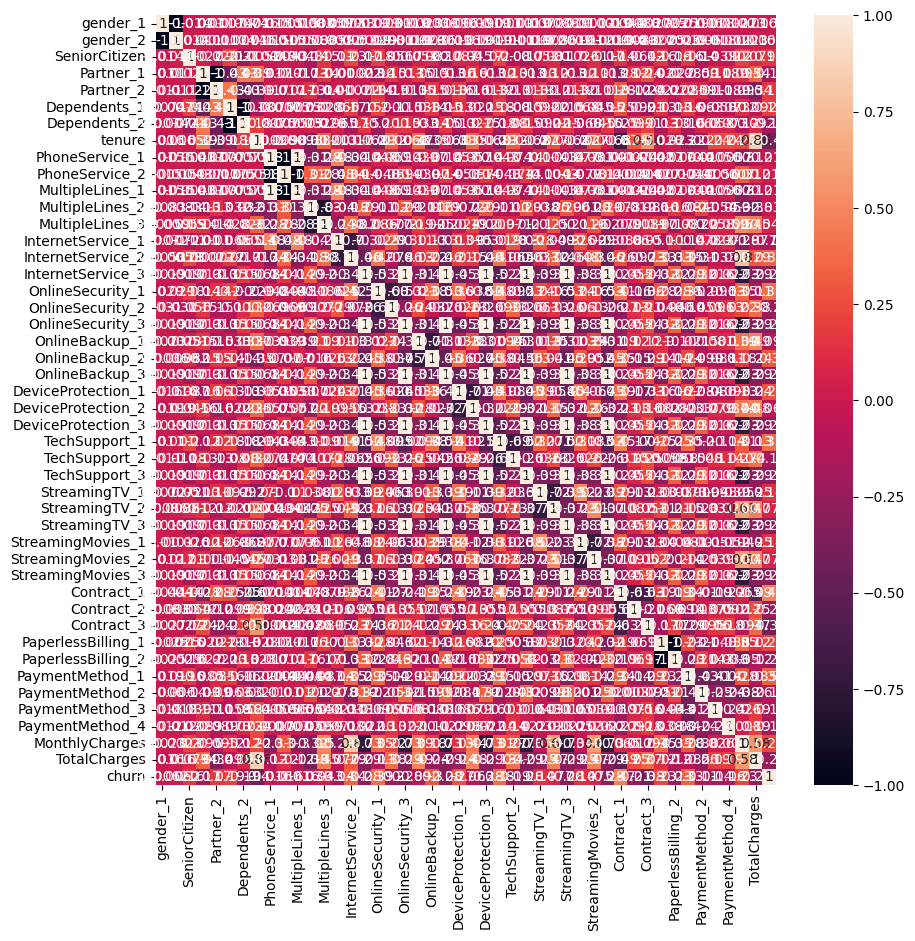

In [12]:
pre_processor.plot_correlation()

In [13]:
pre_processor.calculate_feature_importance()

,importance
TotalCharges,0.151892
tenure,0.127916
MonthlyCharges,0.127321
Contract_1,0.060720
Contract_3,0.042160
OnlineSecurity_1,0.039080
TechSupport_1,0.031039
PaymentMethod_1,0.029012
InternetService_2,0.026253
OnlineBackup_2,0.018091


In [14]:
pre_processor.remove_features_by_importance(0.00)

In [15]:
pre_processor.split_features_labels()

In [16]:
pre_processor.calculate_feature_importance()

,importance
TotalCharges,0.144758
tenure,0.137432
MonthlyCharges,0.128285
Contract_1,0.070657
Contract_3,0.043564
OnlineSecurity_1,0.032343
PaymentMethod_1,0.029291
TechSupport_1,0.023758
InternetService_2,0.022673
SeniorCitizen,0.017261


In [17]:
X_train,X_test,y_train,y_test = pre_processor.train_test_split()

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [19]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=2)

[I 2024-06-11 11:18:16,618] A new study created in memory with name: no-name-7f4d81c4-9c2c-42eb-a6f4-1d5d70797dd2
[I 2024-06-11 11:18:20,170] Trial 0 finished with value: 0.7547295507132891 and parameters: {'n_estimators': 171, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.7547295507132891.
[I 2024-06-11 11:18:23,967] Trial 1 finished with value: 0.7548511307235335 and parameters: {'n_estimators': 183, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7548511307235335.
[I 2024-06-11 11:18:23,967] A new study created in memory with name: no-name-ebe8f019-e37c-4ea0-94bf-979c5019a045
[I 2024-06-11 11:18:24,890] Trial 0 finished with value: 0.7570362591037816 and parameters: {'num_layers': 1, 'layer1_size': 42, 'layer2_size': 62, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09524239503335093}. Best is trial 0 with value: 0.7570362591037816.
[I 2024-06-11 11:18:25,795] Trial 1 finished with v

In [20]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       0.73      0.80      0.76       997
         1.0       0.79      0.73      0.76      1065

    accuracy                           0.76      2062
   macro avg       0.76      0.76      0.76      2062
weighted avg       0.76      0.76      0.76      2062

Neural Network
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       997
         1.0       0.77      0.77      0.77      1065

    accuracy                           0.76      2062
   macro avg       0.76      0.76      0.76      2062
weighted avg       0.76      0.76      0.76      2062

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       997
         1.0       0.86      0.95      0.90      1065

    accuracy                           0.89      2062
   macro avg       0.90      0.89      0.89      2062
weighted avg       0.90    

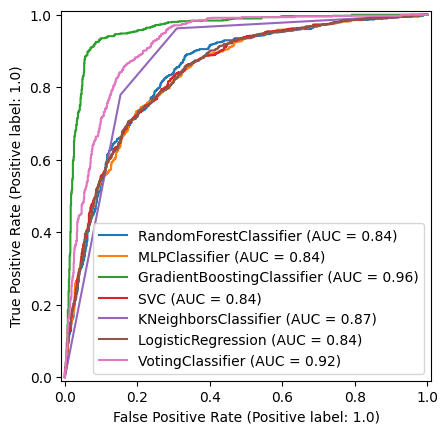

In [21]:
model_select.roc_curve()

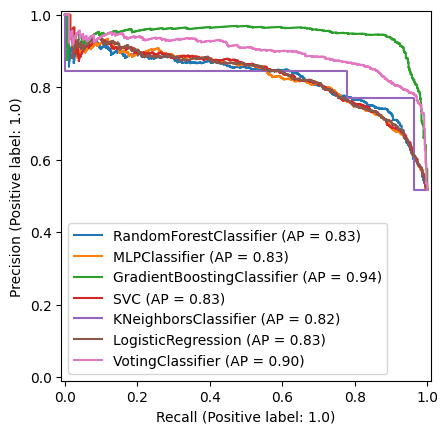

In [22]:
model_select.precision_recall_curve()